###Vamos a visualizar la base de datos que se habia limpiado en el proyecto anterior sobre la limpieza de datos, la base de datos contiene las informaciones concernientes a los anunciantes que ofrecen el servicio Airbnb y los usuarios que solicitan el servicio. En jupyter vamos tratar los datos determinando los niveles de correlaciones y las informaciones estadistica descriptivas pertinentes que ayuden a nuestras visualizaciones.

###Las Visualizaciones se llevaran a cabo en Tableu

In [17]:
#Importamos todas las librerias necesarias para trabajar con la limpieza
import pandas as pd
import numpy as np
from scipy import stats 
import re
import string
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#Observamos un poco la estructura de nuestra base de datos
Airbnb_berlin = pd.read_csv('Airbnb_DataFrame.csv')
Airbnb_berlin.head()

,Unnamed: 0,ID,Resumen,Descripcion_Vivienda,Ubicacion_Anfitrion,Anfitrion_acojedor,Localidad_anfitrion,Conteo_anuncios_Host,Total_conteo_anuncios_Host,Anfitrion_Foto_Perfil,...,Ubicacion_Puntaje,Valor_Puntaje,Requiere_Licencia,Reserva_Instantanea,Disponible_Viaje_Negocios,Cliente_Foto_Perfil,Cliente_Telefono_vericicacion,Conteo_Lista_Anfitrion_Calculada,Reseña_Mensual,Reglas_cancelacion
0,0,2015,Great location! 30 of 75 sq meters. This wood...,Great location 30 of 75 sq meters This wood...,Key Biscayne Florida United States,1,Mitte,4.0,4.0,1,...,10.0,9.0,1,0,0,0,0,4,3.76,2
1,1,2695,Not specified,In the summertime we are spending most of our ...,Berlin Berlin Germany,0,Prenzlauer Berg,1.0,1.0,1,...,10.0,10.0,1,0,0,0,0,1,1.42,0
2,2,3176,This beautiful first floor apartment is situa...,This beautiful first floor apartment is situa...,Coledale New South Wales Australia,0,Prenzlauer Berg,1.0,1.0,1,...,10.0,9.0,1,1,0,0,0,1,1.25,2
3,3,3309,First of all: I prefer short-notice bookings. ...,First of all I prefer short notice bookings ...,Berlin Berlin Germany,0,Schöneberg,1.0,1.0,1,...,9.0,9.0,1,0,0,0,0,1,0.39,2
4,4,7071,Cozy and large room in the beautiful district ...,Cozy and large room in the beautiful district ...,Berlin Berlin Germany,1,Prenzlauer Berg,1.0,1.0,1,...,10.0,9.0,1,0,0,0,0,1,1.75,1


In [16]:
#Eliminamos la primera columna del dataset porque es innecesaria a traves del drop columns usando indice
Airbnb_berlin = Airbnb_berlin.drop(Airbnb_berlin.columns[[0]], axis = 'columns')
Airbnb_berlin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                22552 non-null  int64  
 1   Resumen                           22552 non-null  object 
 2   Descripcion_Vivienda              22552 non-null  object 
 3   Ubicacion_Anfitrion               22552 non-null  object 
 4   Anfitrion_acojedor                22552 non-null  int64  
 5   Localidad_anfitrion               22552 non-null  object 
 6   Conteo_anuncios_Host              22552 non-null  float64
 7   Total_conteo_anuncios_Host        22552 non-null  float64
 8   Anfitrion_Foto_Perfil             22552 non-null  int64  
 9   Identidad_Anfitrion_Verificada    22552 non-null  int64  
 10  Localidad                         22552 non-null  object 
 11  codigo_postal                     21896 non-null  object 
 12  Ubic

In [28]:
#Observamos si existe correlacion entre algunas variables y los precios
a = Airbnb_berlin['Precio'].corr(Airbnb_berlin['Comodidad'])
b = Airbnb_berlin['Precio'].corr(Airbnb_berlin['Camas'])
c = Airbnb_berlin['Precio'].corr(Airbnb_berlin['Dormitorios'])
d = Airbnb_berlin['Precio'].corr(Airbnb_berlin['Salas_Baños'])
f = Airbnb_berlin['Precio'].corr(Airbnb_berlin['Puntaje_Nivel'])
print(a)
print(b)
print(c)
print(d)
print(f)

0.13556316767834944
0.10065808271967061
0.11308285633511352
0.06753235685019333
-0.007882268130828925


In [38]:
precio_columnas = Airbnb_berlin.loc[:, ['Precio', 'Comodidad', 'Camas', 'Dormitorios', 'Salas_Baños', 'Puntaje_Nivel',
                                       'Precio_Persona_Extra', 'Noches_Minimas', 'Noches_Maximas']]
precio_columnas

,Precio,Comodidad,Camas,Dormitorios,Salas_Baños,Puntaje_Nivel,Precio_Persona_Extra,Noches_Minimas,Noches_Maximas
0,60.0,3,2.0,1.0,1.0,93.000000,28.0,4,1125
1,17.0,2,1.0,1.0,1.0,100.000000,0.0,2,40
2,90.0,4,2.0,1.0,1.0,92.000000,20.0,62,1125
3,26.0,2,1.0,1.0,1.0,88.000000,18.0,5,360
4,42.0,2,2.0,1.0,1.0,96.000000,24.0,2,10
...,...,...,...,...,...,...,...,...,...
22547,60.0,2,1.0,1.0,1.0,94.413863,0.0,2,1125
22548,20.0,6,4.0,1.0,1.0,94.413863,10.0,1,14
22549,85.0,2,1.0,0.0,1.0,94.413863,0.0,3,30
22550,99.0,2,1.0,1.0,1.0,94.413863,0.0,1,10


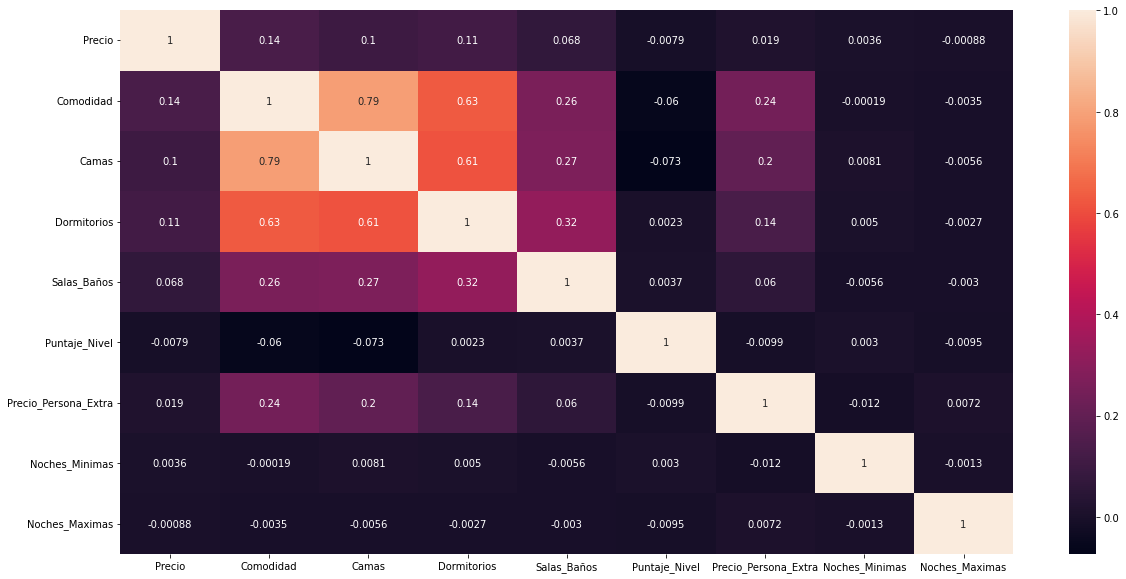

In [39]:
plt.subplots(figsize=(20, 10))
sns.heatmap(precio_columnas.corr(), annot=True);

In [44]:
Airbnb_berlin.shape

(22552, 50)